# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [20]:
# Example reading the SQL database from here

# from dotenv import load_dotenv
# from sqlalchemy import create_engine
# import pandas as pd

# # load the .env file variables
# load_dotenv()

# connection_string = f"mysql+pymysql://{os.getenv('DB_USER')}:{os.getenv('DB_PASSWORD')}@{os.getenv('DB_HOST')}/{os.getenv('DB_NAME')}?autocommit=true"
# engine = create_engine(connection_string)
# engine.connect()

# dataframe = pd.read_sql("Select * from books;", engine)
# print(dataframe.describe())

In [21]:
# Example importing the CSV here

# dataframe = pd.read_csv('../path/to/file.csv')
# dataframe.describe()

In [22]:
import pandas as pd
import requests
import sqlite3
from bs4 import BeautifulSoup

In [23]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text
#html_data

In [24]:
soup = BeautifulSoup(html_data,"html.parser")

In [25]:
tablas=soup.findAll("table")

In [26]:
index_find=0
for i, tabla in(enumerate(tablas)):
    #enumarate asigna i=indice tabla=contenido
    if ("Tesla Quarterly Revenue" in str(tabla)):
        index_find=i


In [27]:
dataValues = []
#df = pd.DataFrame()
for rowT in tablas[index_find].tbody.find_all("tr"):
    #for each tr (row), take the td (column) value
    colT= rowT.find_all("td")
    if len(colT)>0:
        dateVal=colT[0].text
    revenueVal=colT[1].text.replace("$","").replace(",","")
    #print(dateVal," ",revenueVal)
    dataValues.append({"date":dateVal,"revenue":revenueVal})

In [28]:
df = pd.DataFrame.from_records(dataValues)
df

,date,revenue
0,2022-03-31,18756
1,2021-12-31,17719
2,2021-09-30,13757
3,2021-06-30,11958
4,2021-03-31,10389
5,2020-12-31,10744
6,2020-09-30,8771
7,2020-06-30,6036
8,2020-03-31,5985
9,2019-12-31,7384


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     52 non-null     object
 1   revenue  52 non-null     object
dtypes: object(2)
memory usage: 960.0+ bytes


In [29]:
#no hay nulos, reviso igual
nulos=df[df.isnull().any(axis=1)]
print(nulos)

Empty DataFrame
Columns: [date, revenue]
Index: []


In [35]:
df_limpio=df[df["revenue"] != ""]
print(df_limpio)

          date revenue
0   2022-03-31   18756
1   2021-12-31   17719
2   2021-09-30   13757
3   2021-06-30   11958
4   2021-03-31   10389
5   2020-12-31   10744
6   2020-09-30    8771
7   2020-06-30    6036
8   2020-03-31    5985
9   2019-12-31    7384
10  2019-09-30    6303
11  2019-06-30    6350
12  2019-03-31    4541
13  2018-12-31    7226
14  2018-09-30    6824
15  2018-06-30    4002
16  2018-03-31    3409
17  2017-12-31    3288
18  2017-09-30    2985
19  2017-06-30    2790
20  2017-03-31    2696
21  2016-12-31    2285
22  2016-09-30    2298
23  2016-06-30    1270
24  2016-03-31    1147
25  2015-12-31    1214
26  2015-09-30     937
27  2015-06-30     955
28  2015-03-31     940
29  2014-12-31     957
30  2014-09-30     852
31  2014-06-30     769
32  2014-03-31     621
33  2013-12-31     615
34  2013-09-30     431
35  2013-06-30     405
36  2013-03-31     562
37  2012-12-31     306
38  2012-09-30      50
39  2012-06-30      27
40  2012-03-31      30
41  2011-12-31      39
42  2011-09

<AxesSubplot:xlabel='date', ylabel='revenue'>

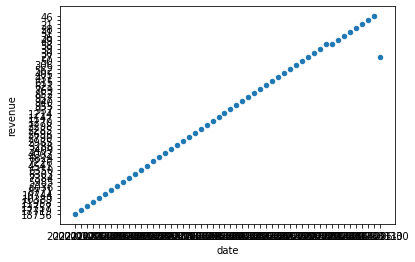

In [37]:
df.plot(kind="scatter",x="date",y="revenue")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     52 non-null     object
 1   revenue  52 non-null     object
dtypes: object(2)
memory usage: 960.0+ bytes
